In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
df = pd.read_csv('smoke_detection_iot.csv')

In [60]:
df = df.drop(columns=['Unnamed: 0', 'UTC'])

print(df.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'FireAlarm'],
      dtype='object')


In [61]:
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [62]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [63]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [64]:
X = df.drop('FireAlarm',axis=1)
y = df['FireAlarm']

In [1]:
from sklearn.feature_selection import VarianceThreshold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df1 = pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)
df1

NameError: name 'train_test_split' is not defined

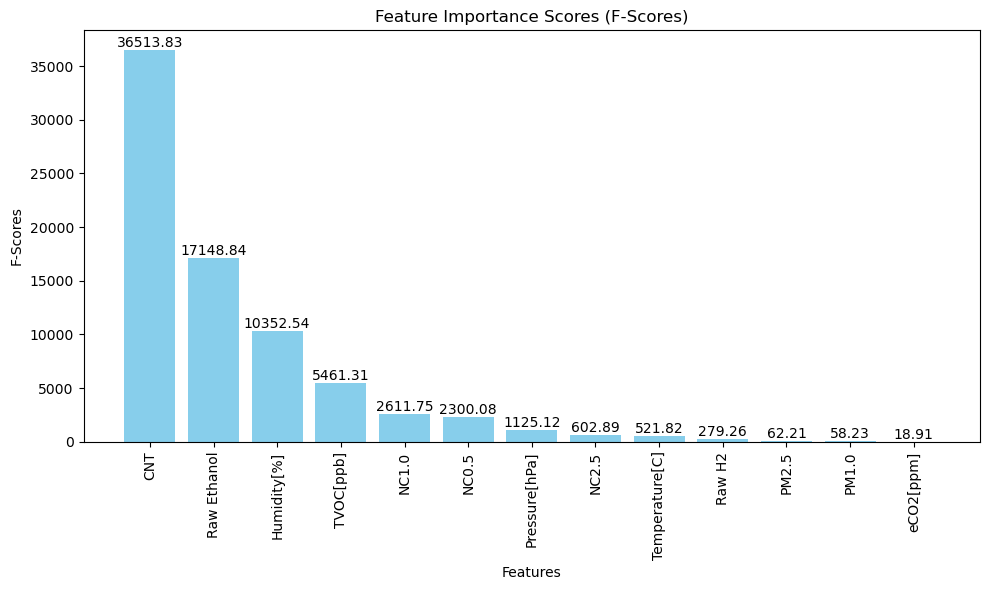

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Fit SelectKBest to your training data
Kbest_classif = SelectKBest(score_func=f_classif, k=6)
Kbest_classif.fit(X_train, y_train)

# Get the scores and feature names
scores = Kbest_classif.scores_
feature_names = X_train.columns

# Sort the scores and feature names in descending order of importance
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_scores, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Scores')
plt.title('Feature Importance Scores (F-Scores)')

# Add scores as text labels above the bars
for i, score in enumerate(sorted_scores):
    plt.text(i, score + 0.1, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


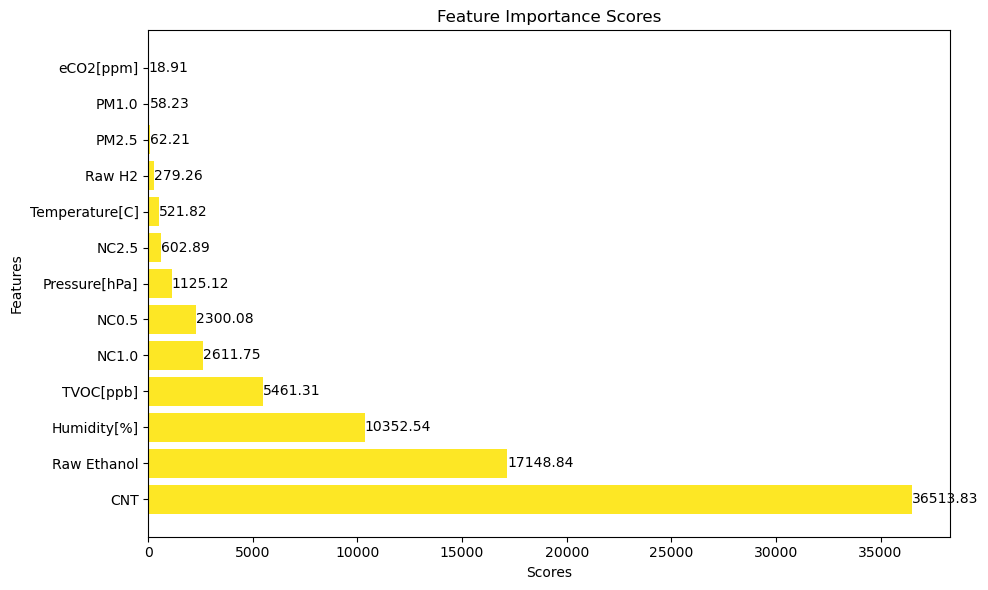

In [67]:
import matplotlib.pyplot as plt

# Sort the data by scores in descending order
data = sorted(list(zip([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)), key=lambda x: x[1], reverse=True)

# Separate the data into two lists
features = [item[0] for item in data]
scores = [item[1] for item in data]

# Create a horizontal bar plot with a color gradient
fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = plt.cm.viridis(scores)  # Use a color map for the bars

bars = ax.barh(features, scores, color=bar_colors)

# Add labels and a title
ax.set_xlabel('Scores')
ax.set_ylabel('Features')
ax.set_title('Feature Importance Scores')

# Add the scores as text labels on the bars
for bar, score in zip(bars, scores):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center')

plt.tight_layout()
plt.show()


In [68]:
# transform training set , but we can pick by ourself
X_train_classif = Kbest_classif.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_classif.transform(X_test)

X_train.shape: (43841, 13)

X_train_selected.shape: (43841, 6)



In [69]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_classif, y_test),4)}')

#In this example, by using only 6 features of the dataset, we got not better score than by using whole features.

Score with all features: 0.9896
Score with only selected features: 0.9742


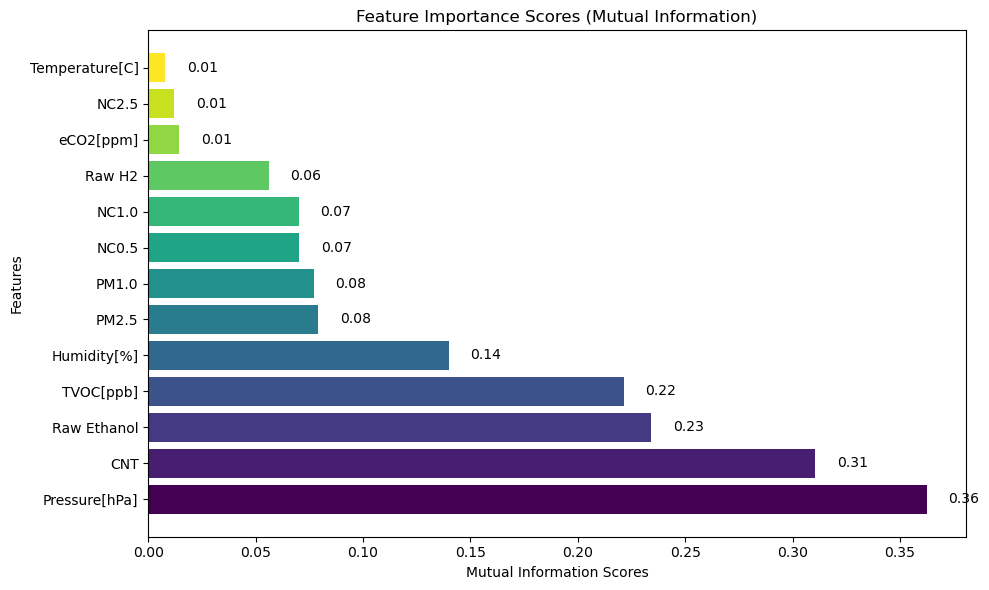

In [70]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Fit SelectKBest to your training data
infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)
infogain_classif.fit(X_train, y_train)

# Get the scores and feature names
scores = infogain_classif.scores_
feature_names = X_train.columns

# Sort the scores and feature names in descending order of importance
sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
sorted_scores = [scores[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a horizontal bar plot with color gradient
plt.figure(figsize=(10, 6))
bar_colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_scores)))  # Use a color map for the bars

bars = plt.barh(sorted_feature_names, sorted_scores, color=bar_colors)

# Add scores as text labels to the right of the bars
for bar, score in zip(bars, sorted_scores):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center')

plt.xlabel('Mutual Information Scores')
plt.ylabel('Features')
plt.title('Feature Importance Scores (Mutual Information)')

plt.tight_layout()
plt.show()

In [71]:

from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [72]:
percentile.get_support()

array([False,  True,  True, False, False,  True, False, False, False,
        True,  True, False,  True])

In [73]:
X_train.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT'],
      dtype='object')

In [74]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier 
rfe_features = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=6)

rfe_features.fit(X_train, y_train)

rfe_features.get_support()  # how can we know which column is true

array([False,  True,  True, False, False,  True,  True, False, False,
        True, False, False,  True])

In [75]:
from sklearn.feature_selection import RFECV


rfecv = RFECV(estimator=RandomForestClassifier() , step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 3
Best features : Index(['TVOC[ppb]', 'Pressure[hPa]', 'CNT'], dtype='object')


In [77]:
df_corr = pd.DataFrame(df.corrwith(df['FireAlarm']),columns='correlation'.split(','))

In [78]:
df_corr

,correlation
Temperature[C],-0.106453
Humidity[%],0.438062
TVOC[ppb],0.332511
eCO2[ppm],-0.019519
Raw H2,0.077128
Raw Ethanol,-0.532279
Pressure[hPa],0.162916
PM1.0,0.034360
PM2.5,0.036015
NC0.5,0.219461


In [79]:
df_corr.style.bar(color='lightgreen',subset=['correlation'])

,correlation
Temperature[C],-0.106453
Humidity[%],0.438062
TVOC[ppb],0.332511
eCO2[ppm],-0.019519
Raw H2,0.077128
Raw Ethanol,-0.532279
Pressure[hPa],0.162916
PM1.0,0.034360
PM2.5,0.036015
NC0.5,0.219461


<Axes: >

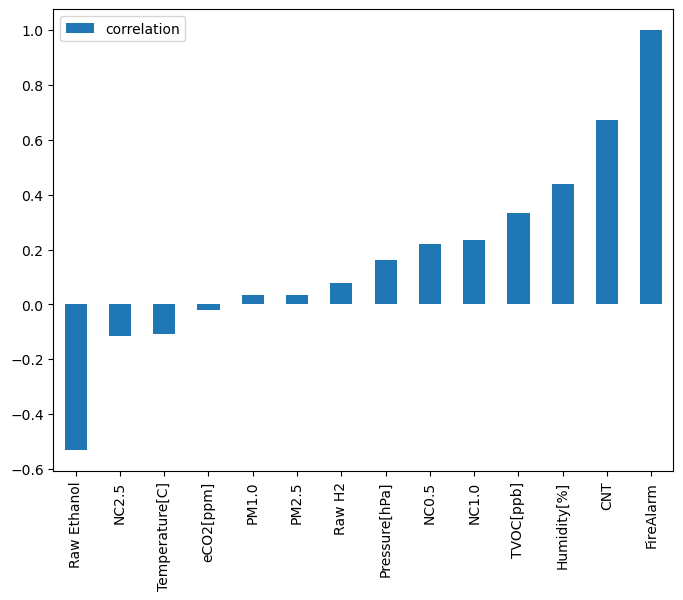

In [80]:
df_corr.sort_values(by=['correlation'],ascending=True).plot(kind='bar')

In [81]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info   #now you know colum name and these value ,. make dataframe like above as i created also make plot

array([0.005605  , 0.13776075, 0.22125992, 0.01717967, 0.0616411 ,
       0.23636099, 0.36385301, 0.08151786, 0.07692358, 0.06576809,
       0.06956984, 0.01757314, 0.31090243])

In [82]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values  #now you know colum name and these value ,. make dataframe like above as i created aslo make plot

(array([1.27360626e+06, 1.39566271e+06, 1.67791323e+06, 1.14096340e+04,
        1.16131635e+04, 2.09171523e+06, 2.07611866e+05, 5.85861417e+03,
        6.22821633e+03, 5.10600650e+05, 8.29967999e+05, 1.29584058e+05,
        1.09214521e+08]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

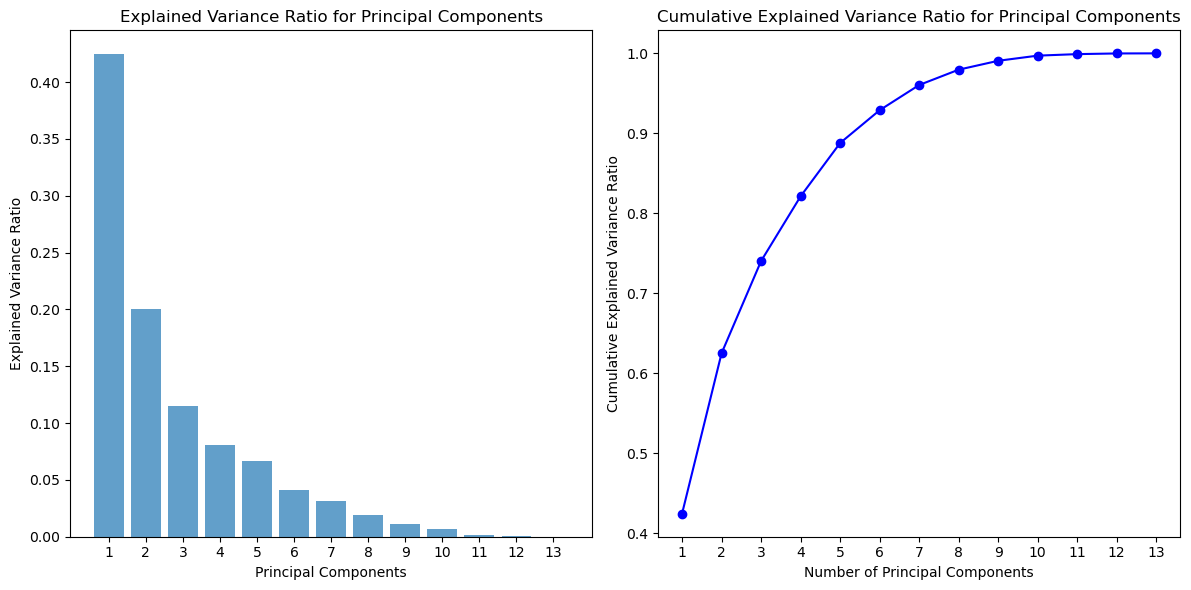

In [92]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Choose the number of principal components you want to retain
n_components = 13  # Change this to the desired number of components

# Create a PCA model and fit it to the scaled data
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame to store the principal components and name them
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Assign the original feature names to the retained principal components
principal_df.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
                        'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
                        'NC2.5', 'CNT']

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Create a better graph with explained variance and cumulative explained variance
plt.figure(figsize=(12, 6))

# Bar plot for explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

# Line plot for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

plt.tight_layout()
plt.show()

# You can use 'principal_df' for further analysis or modeling


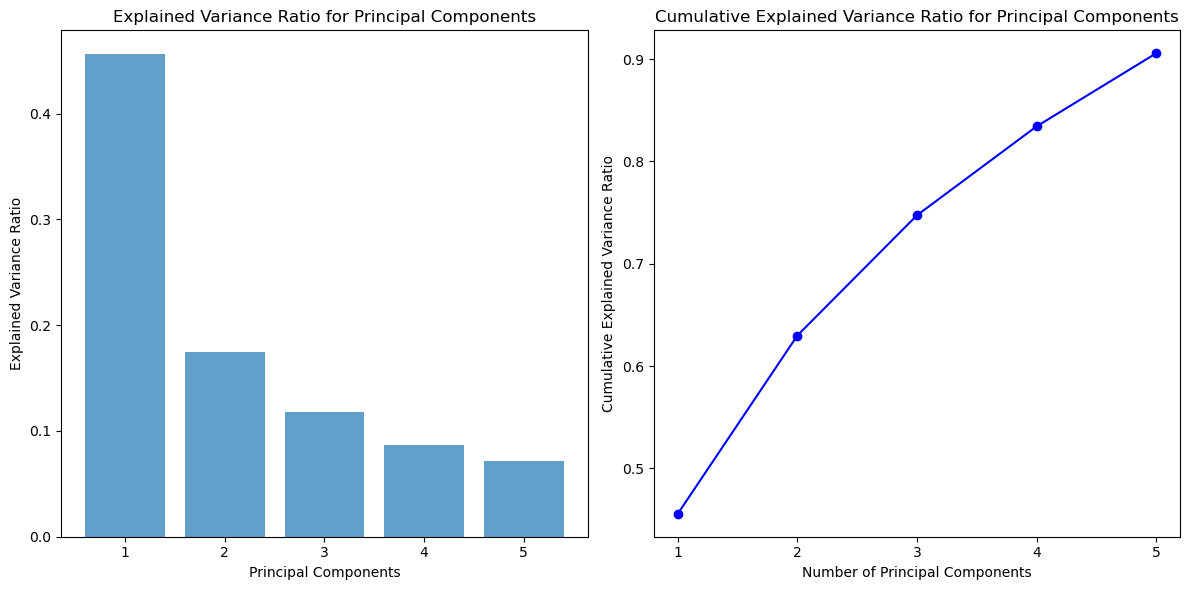

In [103]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data

# Separate the target variable (if applicable)
# y = df['TargetColumn']  # Replace 'TargetColumn' with your target variable column name
# X = df.drop(columns=['TargetColumn'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA model
n_components = 5  # Change this to the desired number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to the scaled data
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(12, 6))

# Bar plot for explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

# Line plot for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

plt.tight_layout()
plt.show()

# You can use 'principal_df' for further analysis or modeling
